# Quantum Time Series Analysis: A Tutorial

### Author
- **Jacob Cybulski**, jacob.cybulski[at]deakin.edu.au<br/>
    School of IT, SEBE, Deakin University, Melbourne, Vic, Australia

### Aims
> *This script tests utility functions.*

In [1]:
import sys
sys.path.append('.')
sys.path

['/home/jacob/Dropbox/Dev/Python/qiskit/projects/ts/tqcebt_qtsa',
 '/home/jacob/anaconda3/envs/qiskit/lib/python38.zip',
 '/home/jacob/anaconda3/envs/qiskit/lib/python3.8',
 '/home/jacob/anaconda3/envs/qiskit/lib/python3.8/lib-dynload',
 '',
 '/home/jacob/anaconda3/envs/qiskit/lib/python3.8/site-packages',
 '/home/jacob/anaconda3/envs/qiskit/lib/python3.8/site-packages/IPython/extensions',
 '/home/jacob/.ipython',
 '.']

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import math
from IPython.display import clear_output
%matplotlib inline

from utils import *

In [3]:
debug = True

## Testing regressor callback function

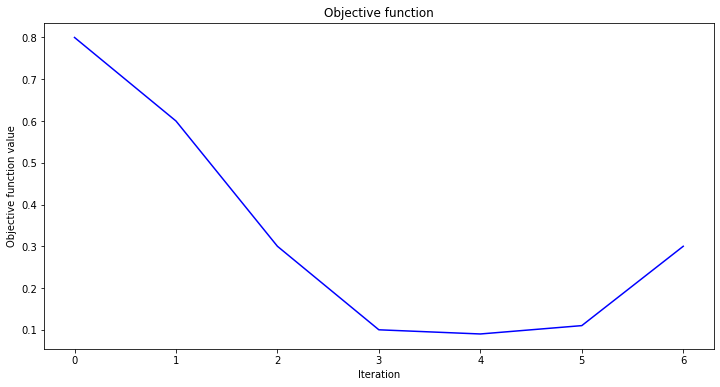

After min obj fun val: (4, 0.09)


In [4]:
### Test callback function

if debug:
    from utils import *

    # Create a callback, which can be optionally initialised
    cf = Regr_callback()
    cf.reset(obfun=[])
    
    # Simulate "graph" callback with plot, which is done by optimiser
    # - we ignore the weights and keep only values of an objective function
    for i in range(3):
        if   i == 0: cf.graph([0.2, 0.3, 0.4], 0.8)
        elif i == 1: cf.graph([0.5], 0.6)
        elif i == 2: cf.graph([0.3, 0.2], 0.3)
    
    # Simulate "collect" silent callback, which is done by optimiser
    # - we ignore the weights and keep only values of an objective function
    # - the controlled prints will appear for an instance
    for i in range(3, 7):
        if   i == 3: cf.collect([0.9], 0.1)
        elif i == 4: cf.collect([0.2, 0.7, -0.1], 0.09)
        elif i == 5: cf.collect([1], 0.11)
        elif i == 6: cf.collect([-1], 0.3)

    # Finally plot the full chart
    cf.plot()
    
    # Retrieve some stats
    print('After min obj fun val:', cf.min_obj())

## Testing target functions
*Each target defines its X range, y range needs to be $\textit{[0,+1]}$*

x range: [-6.283  6.283]
y range: [0. 1.]
eps:     0.1
Sample point value: 0.56
In between points value ( 1 , 2 ):  0.408 

Sample values:
 [[0.169]
 [0.484]
 [0.595]] 



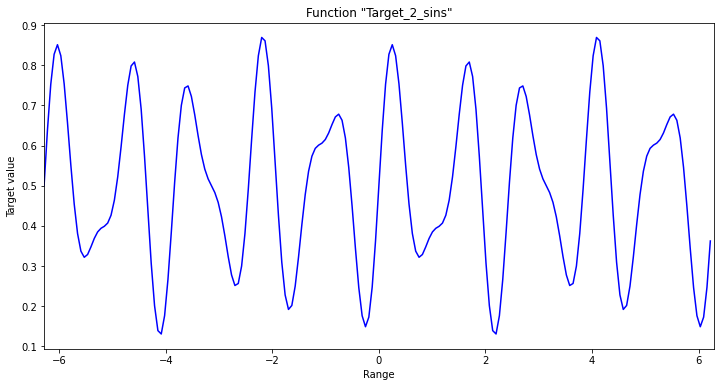

In [5]:
### Test target function(s)
if debug:
    
    ### Select a target class and its parameters (see: utils.py), e.g.
    #   Target_sin() # Target_2_sins() # Target_poly() # Target_poly_3()
    #   Target_line() # Target_line(slope=0.5, intercept=0.2, xmin=0, xmax=1.5)
    #   Target_line(slope=0.7, intercept=-0.5, xmin=1, xmax=2) # Target_trig_trend()
    #   Target_jitter() # Target_beer() # Target_beer(pt_from=104, pt_to=156)

    fn_test = Target_2_sins()
    
    print('x range:', np.round(fn_test.xrange(), 3))
    print('y range:', np.round(fn_test.yrange(), 3))
    print('eps:    ', np.round(fn_test.eps(), 3))
    print('Sample point value:', np.round(fn_test.fun(5), 3))
    print('In between points value (', 1, ',', 2, '): ', np.round(fn_test.fun(1.2), 3), '\n')
    print('Sample values:\n', np.round(fn_test.fun(np.array([[2.1],[3.2],[5.1]])), 3), '\n')
    fn_test.plot(sample_no=200)

## Testing windowing functions

In [6]:
from pprint import pprint
if debug:
    
    # Sample data
    n = 100
    wind = 10
    step = 5
    horiz = 3
    split = 0.7
    
    y = np.arange(n)

    print('Created a sequence with\n\n' +
          '\trecords=%d\n' % n +
          '\twindow=%d\n' % wind +
          '\tstep=%d\n' % step +
          '\thoriz=%d\n' % horiz +
          '\tsplit=%d\n' % split)
    
    # Split data into windows
    print('Data split into windows\n')
    pprint(y_wind_make(y, wind, step))
    
    # Split data into X and y windows
    print('\nData split into X and y windows\n')
    pprint(Xy_wind_make(y, wind, step, horiz))
    
    # Split data into X and y windows for training and testing
    print('\nData split into X and y windows for training and testing\n')
    pprint(Xy_wind_split(y, wind, step, horiz, split))

Created a sequence with

	records=100
	window=10
	step=5
	horiz=3
	split=0

Data split into windows

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [65, 66, 67, 68, 69, 70, 71, 72, 73, 74],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [75, 76, 77, 78, 79, 80, 81, 82, 83, 84],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [85, 86, 87, 88, 89, 90, 91, 92, 93, 94],
       [90, 91, 9

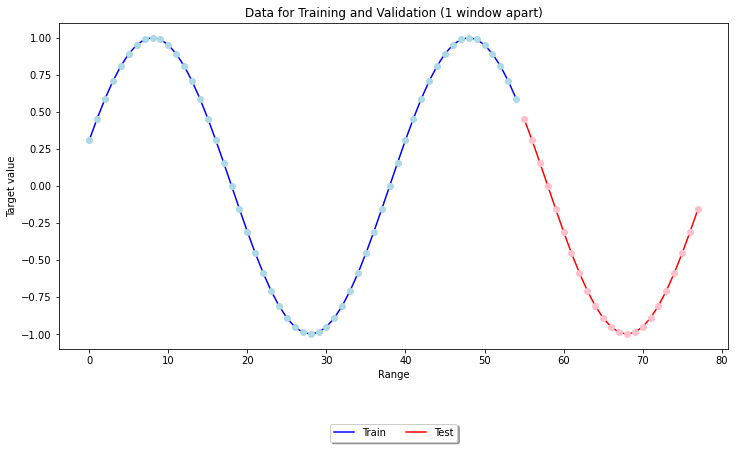

In [7]:
if debug:
    # Generate data
    y = np.array([np.sin(x) for x in np.arange(-2*np.pi, 2*np.pi, np.pi / 100)])

    # Prepare X and y for training
    X_train_ts, y_train_ts, X_valid_ts, y_valid_ts = Xy_wind_split(y, wind, step, horiz, split)

    # Plot prepared data
    plt.rcParams["figure.figsize"] = (12, 6)
    plt.title("Data for Training and Validation (1 window apart)")
    plt.xlabel("Range")
    plt.ylabel("Target value")

    # Plot target function
    plt.plot(range(X_train_ts.shape[0]), [y[0] for y in y_train_ts], color='blue', label='Train')
    plt.plot(range(X_train_ts.shape[0]), [y[0] for y in y_train_ts], marker='o', color='lightblue', linestyle='None')
    plt.plot(range(X_train_ts.shape[0], X_train_ts.shape[0]+X_valid_ts.shape[0]), [y[0] for y in y_valid_ts], color='red', label='Test')
    plt.plot(range(X_train_ts.shape[0], X_train_ts.shape[0]+X_valid_ts.shape[0]), [y[0] for y in y_valid_ts], 
             marker='o', color='pink', linestyle='None')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3),
              ncol=2, fancybox=True, shadow=True)
    plt.show()

In [8]:
import qiskit.tools.jupyter
%qiskit_version_table